<a href="https://colab.research.google.com/github/SouridyaDey/airline-sentiment-analysis/blob/master/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [ ]:
df = pd.read_csv('Tweets.csv')

In [ ]:
df.sample(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
10692,568969970513653762,negative,1.0000,Customer Service Issue,0.3529,US Airways,NaN,MattStropoli,NaN,0,@USAirways literally the worst flying experien...,NaN,2015-02-20 19:06:26 -0800,California,NaN
4677,569942616617447424,negative,1.0000,Bad Flight,0.6767,Southwest,NaN,FactualRevolt,NaN,0,@SouthwestAir this is not a fair set up. I pay...,NaN,2015-02-23 11:31:23 -0800,NaN,Arizona
13695,569745303794024448,negative,1.0000,Late Flight,1.0000,American,NaN,esmdesigns,NaN,0,@AmericanAir Flight #2390 delayed 14 hours!! N...,NaN,2015-02-22 22:27:20 -0800,Michigan,Eastern Time (US & Canada)
3598,568244663154393088,negative,1.0000,Can't Tell,0.6458,United,NaN,Atrain_8,NaN,3,@united you're missin the point! There was no ...,NaN,2015-02-18 19:04:19 -0800,NaN,NaN
882,570038991527002112,positive,0.3427,NaN,0.0000,United,NaN,NonYourBusines9,NaN,0,@united I left my comment with customer care. ...,NaN,2015-02-23 17:54:21 -0800,NaN,NaN
5025,569521838625312769,negative,1.0000,Late Flight,0.3729,Southwest,NaN,gotomaio,NaN,0,"@SouthwestAir @AARP @JimCramer 75yo mom says, ...",NaN,2015-02-22 07:39:22 -0800,NaN,Quito
10532,569220438397751299,positive,1.0000,NaN,NaN,US Airways,NaN,culvert,NaN,0,@USAirways your team member at DCA- Tamara R. ...,NaN,2015-02-21 11:41:42 -0800,"Miami, Fla",Eastern Time (US & Canada)
4169,567797327071838208,positive,1.0000,NaN,NaN,United,NaN,KCousineau09,NaN,0,@united Thanks for the timely service &amp; gr...,NaN,2015-02-17 13:26:46 -0800,"Titletown, USA",Central Time (US & Canada)
8763,567864793404555264,negative,1.0000,Customer Service Issue,0.6600,Delta,NaN,mellamommy,NaN,0,@JetBlue received horrible customer service at...,NaN,2015-02-17 17:54:51 -0800,NaN,NaN
12200,570264179216510976,neutral,1.0000,NaN,NaN,American,NaN,dfwairport,NaN,0,@AmericanAir You're right. Someone is up to so...,NaN,2015-02-24 08:49:09 -0800,"DFW Airport, TX",Central Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.drop(columns = ['tweet_id', 'airline_sentiment_confidence', 'negativereason_confidence', 'airline_sentiment_gold', 'name',
                    'negativereason_gold', 'tweet_coord', 'tweet_location'], inplace = True)

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df['tweet_hour'] = df['tweet_created'].dt.hour

In [ ]:
df.drop(columns = 'tweet_created', inplace = True)

In [ ]:
df.sample()

,airline_sentiment,negativereason,airline,retweet_count,text,user_timezone,tweet_hour
2874,positive,NaN,United,0,@united Looks like they came through. Thanks a...,Eastern Time (US & Canada),11


In [ ]:
df.duplicated().sum()

np.int64(113)

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.isnull().sum()

,0
airline_sentiment,0
negativereason,5409
airline,0
retweet_count,0
text,0
user_timezone,4785
tweet_hour,0


In [ ]:
df.rename(columns={'airline_sentiment':'target'},inplace=True)

/tmp/ipython-input-557838447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'airline_sentiment':'target'},inplace=True)


In [ ]:
df.head()

,target,negativereason,airline,retweet_count,text,user_timezone,tweet_hour
0,neutral,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),11
1,positive,NaN,Virgin America,0,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),11
2,neutral,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),11
3,negative,Bad Flight,Virgin America,0,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),11
4,negative,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),11


In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
X = df.drop(columns = 'target')
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
y_train.value_counts()

,count
target,
negative,7320
neutral,2439
positive,1862


In [ ]:
y_test.value_counts()

,count
target,
negative,1798
neutral,635
positive,473


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
# Categorical columns
cat_cols = ['negativereason', 'user_timezone']

from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='constant', fill_value='Not available')

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [ ]:
!pip install emoji beautifulsoup4 pyspellchecker contractions

import re
import string
import html
import emoji
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from contractions import fix as fix_contractions

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

# Chatword dictionary (expand as needed)
chat_words_map = {
    "u": "you", "ur": "your", "luv": "love", "gr8": "great",
    "b4": "before", "omg": "oh my god", "idk": "i do not know",
    "im": "i am", "thx": "thanks", "wanna": "want to",
    "gonna": "going to", "cuz": "because", 'fyi': 'For you information'
}

def expand_chatwords(text):
    return " ".join([chat_words_map.get(w, w) for w in text.split()])

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Expand HTML entities
    text = html.unescape(text)

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)

    # Expand contractions
    text = fix_contractions(text)

    # Expand chatwords
    text = expand_chatwords(text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers and special characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words and word not in string.punctuation]

    return " ".join(words)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 7.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_train['transformed_text'] = X_train['text'].apply(clean_text)
X_test['transformed_text'] = X_test['text'].apply(clean_text)

In [ ]:
X_train.drop(columns = 'text', inplace = True)
X_test.drop(columns = 'text', inplace = True)

In [ ]:
y_train= pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_train= pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
y_train.columns = ['target'] #Ensure y_train has column name
y_test.columns = ['target'] #Ensure y_test has column name

X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

df_train = pd.concat([X_train_reset, y_train_reset], axis=1)
df_test = pd.concat([X_test_reset, y_test_reset], axis=1)

In [ ]:
df_train.head()

,negativereason,airline,retweet_count,user_timezone,tweet_hour,num_characters,num_words,num_sentences,transformed_text,target
0,Can't Tell,United,0,Not available,14,21,5,1,ouch fair,0
1,Lost Luggage,US Airways,0,Eastern Time (US & Canada),9,94,22,2,pretti upset drove philli mhtt still info bag ...,0
2,Can't Tell,American,0,Not available,14,133,27,1,day come suppos get money back bank receiv anyth,0
3,Can't Tell,Southwest,0,Not available,18,95,17,1,help tri get nashvilleshould waiv chang fee,0
4,Can't Tell,United,0,Central Time (US & Canada),9,17,4,1,rude rude,0


In [ ]:
df_test.head()

,negativereason,airline,retweet_count,user_timezone,tweet_hour,num_characters,num_words,num_sentences,transformed_text,target
0,Not available,United,0,Not available,10,108,24,1,still wait respons whether allow use rear face...,1
1,Flight Booking Problems,United,0,Central Time (US & Canada),5,48,12,2,overbook fifti peopl worst,0
2,Can't Tell,American,0,Not available,12,117,27,2,call chairman call emerald today call former c...,0
3,Customer Service Issue,American,0,Eastern Time (US & Canada),7,123,25,2,lost found like talk hormon teenag refus talk,0
4,Late Flight,United,0,Not available,8,114,18,1,ua iad la mechan problem switch aircraft delay...,0


In [ ]:
y_train.value_counts()

,count
target,
0,7320
1,2439
2,1862


In [ ]:
y_test.value_counts()

,count
target,
0,1798
1,635
2,473


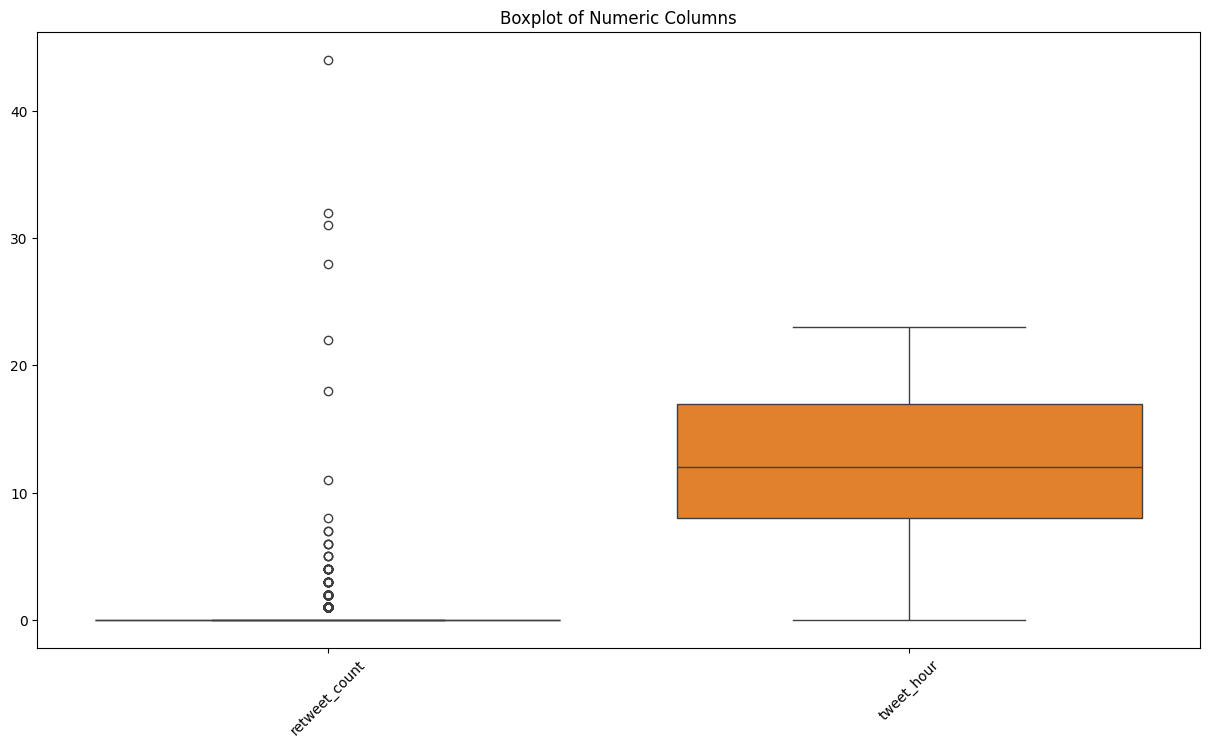

In [ ]:
# Select numeric columns
numeric_cols = ['retweet_count', 'tweet_hour']

plt.figure(figsize=(15, 8))

# Use seaborn to plot
sns.boxplot(data= X_train[numeric_cols])

plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_counts = {}

for col in numeric_cols:
    lower_bound = X_train[col].quantile(0.01)
    upper_bound = X_train[col].quantile(0.99)
    outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Display the outlier counts
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers (based on 1st and 99th percentiles)")

retweet_count: 100 outliers (based on 1st and 99th percentiles)
tweet_hour: 103 outliers (based on 1st and 99th percentiles)


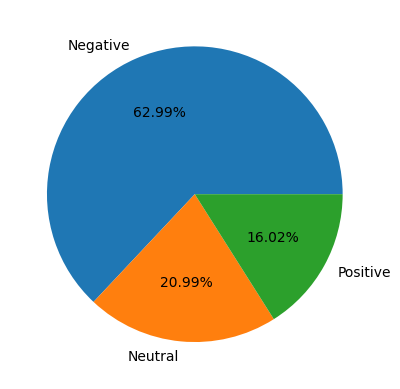

In [ ]:
plt.pie(y_train.value_counts(), labels=['Negative', 'Neutral', 'Positive'],autopct='%0.2f%%')
plt.show()

Text(0.5, 1.0, 'Number of tweets for every Airline with sentiment distribution')

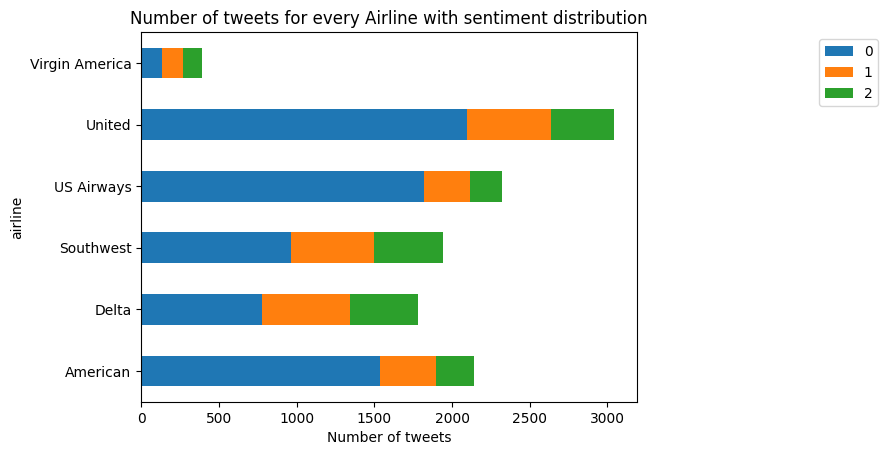

In [ ]:
types = df_train.groupby('airline')['target'].value_counts().sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel("Number of tweets")
plt.title("Number of tweets for every Airline with sentiment distribution")

Text(0.5, 1.0, 'Distribution of Number of negative tweets for every Airline')

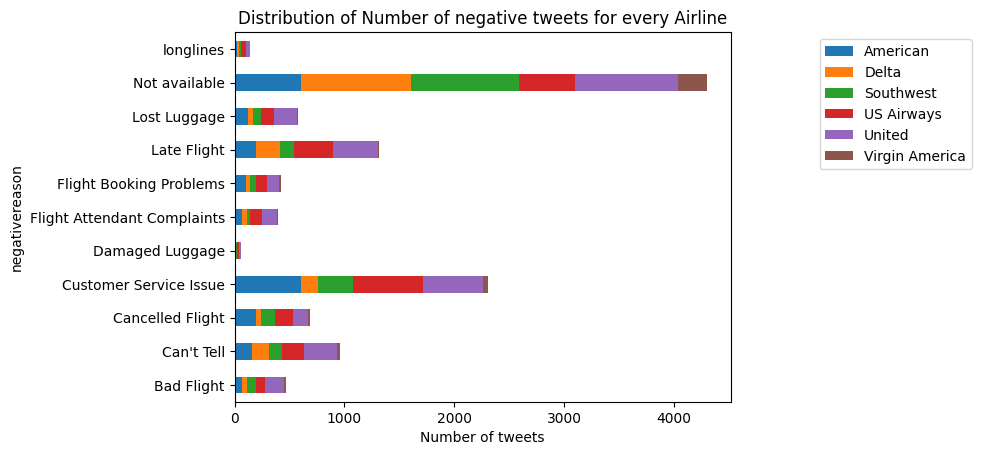

In [ ]:
types = df_train.groupby("negativereason")['airline'].value_counts().sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel('Number of tweets')
plt.title('Distribution of Number of negative tweets for every Airline')

Text(0.5, 1.0, 'Number of tweets for each tweet hour with sentiment distribution')

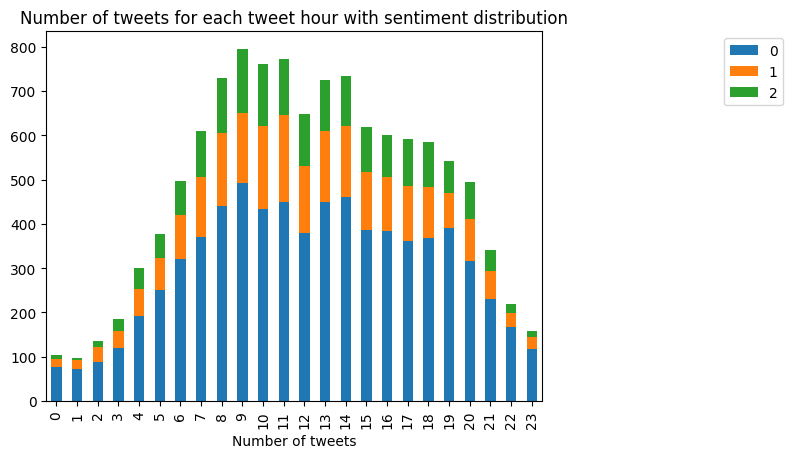

In [ ]:
types = df_train.groupby('tweet_hour')['target'].value_counts().sort_index()
types.unstack().plot(kind='bar', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel("Number of tweets")
plt.title("Number of tweets for each tweet hour with sentiment distribution")

<Axes: xlabel='num_words', ylabel='Count'>

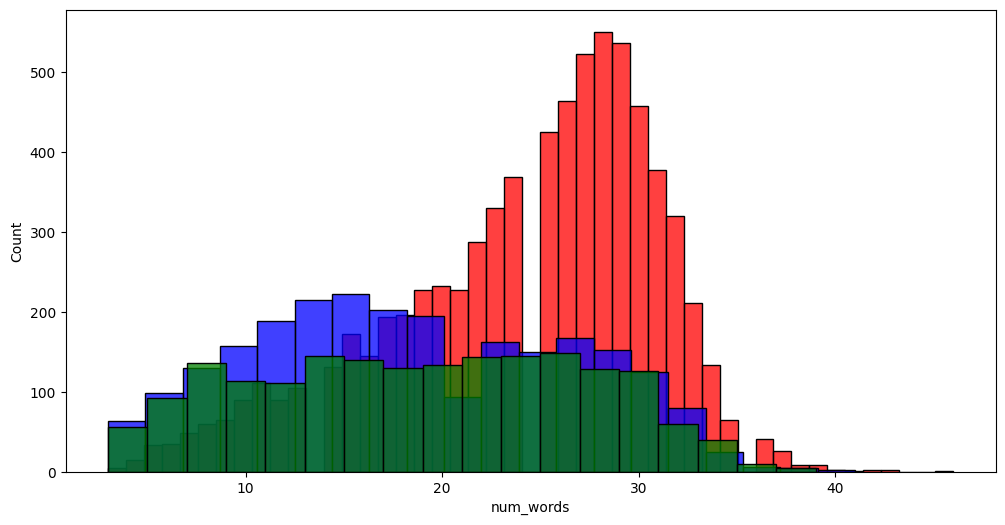

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df_train[df_train['target'] == 0]['num_words'],color='red')
sns.histplot(df_train[df_train['target'] == 1]['num_words'],color='blue')
sns.histplot(df_train[df_train['target'] == 2]['num_words'],color='green')

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

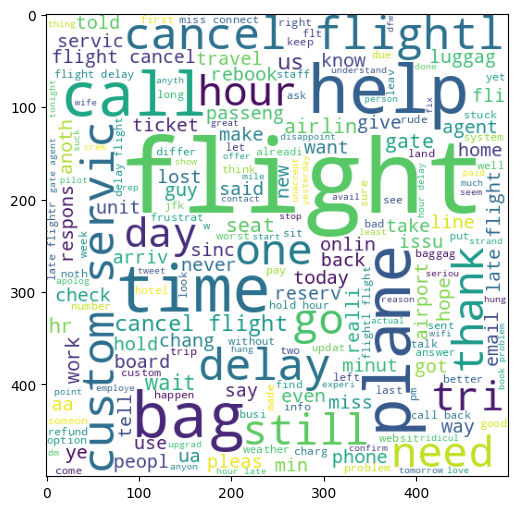

In [ ]:
neg_wc = wc.generate(df_train[df_train['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(neg_wc)

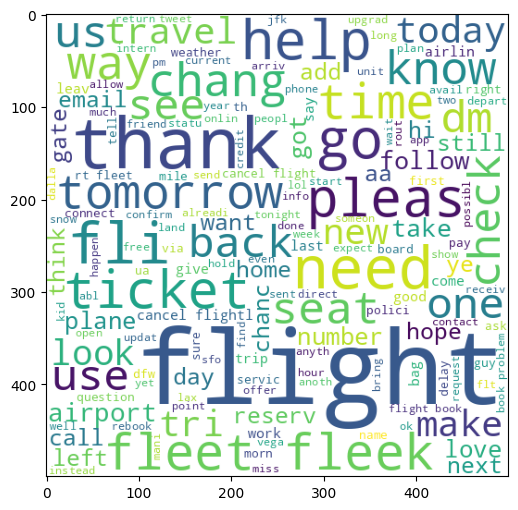

In [ ]:
neu_wc = wc.generate(df_train[df_train['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(neu_wc)

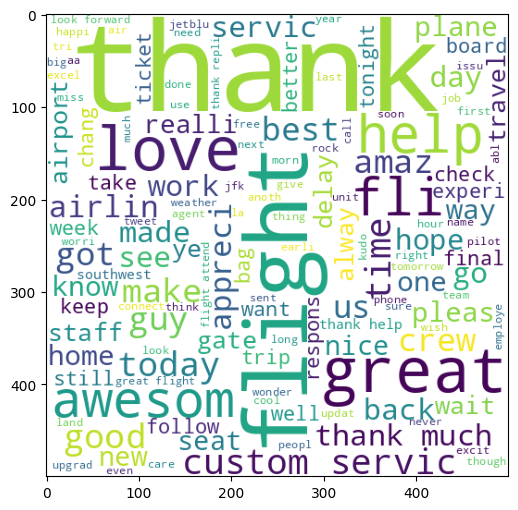

In [ ]:
pos_wc = wc.generate(df_train[df_train['target'] == 2]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(pos_wc)

In [ ]:
pos_corpus = []
for msg in df_train[df_train['target'] == 2]['transformed_text'].tolist():
    for word in msg.split():
        pos_corpus.append(word)
neg_corpus = []
for msg in df_train[df_train['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        neg_corpus.append(word)
neu_corpus = []
for msg in df_train[df_train['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        neu_corpus.append(word)

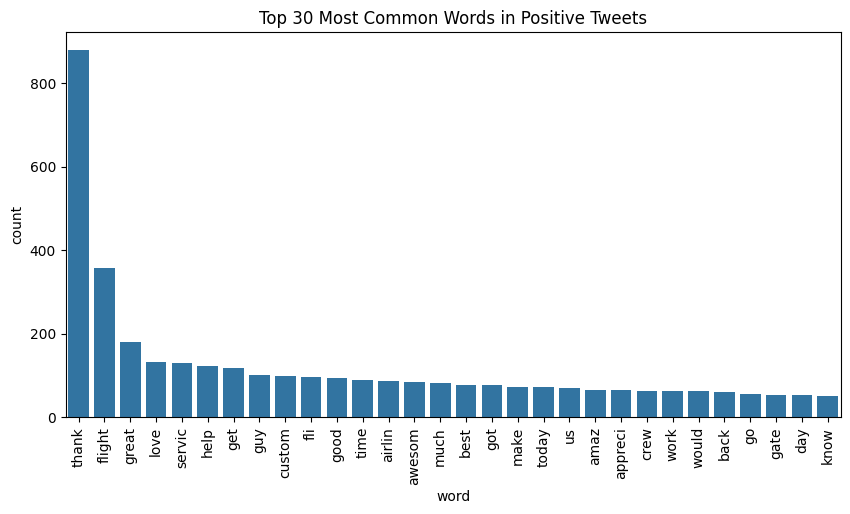

In [ ]:
from collections import Counter

# Get top 30 most common words
common_words = Counter(pos_corpus).most_common(30)

# Convert to DataFrame
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Positive Tweets')
plt.show()

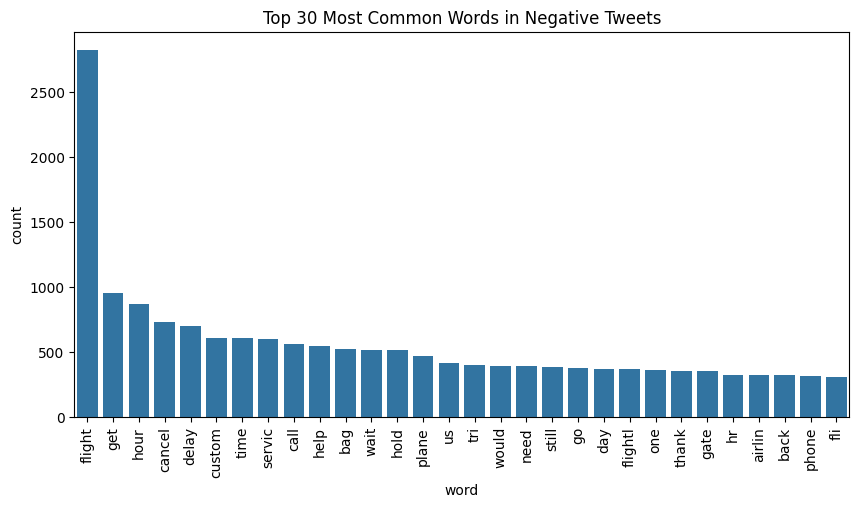

In [ ]:
from collections import Counter

# Get top 30 most common words
common_words = Counter(neg_corpus).most_common(30)

# Convert to DataFrame
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Negative Tweets')
plt.show()

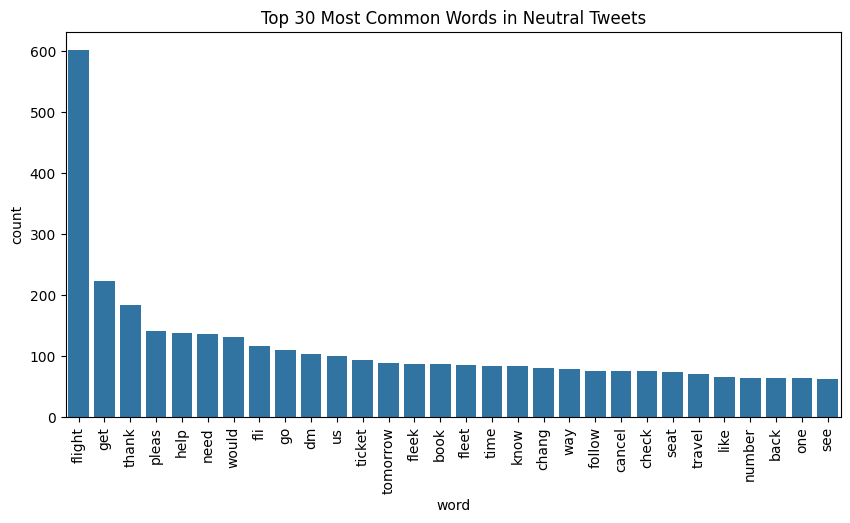

In [ ]:
from collections import Counter

# Get top 30 most common words
common_words = Counter(neu_corpus).most_common(30)

# Convert to DataFrame
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Neutral Tweets')
plt.show()

In [ ]:
X_train.head()

,negativereason,airline,retweet_count,user_timezone,tweet_hour,num_characters,num_words,num_sentences,transformed_text
1711,Can't Tell,United,0,Not available,14,21,5,1,ouch fair
10050,Lost Luggage,US Airways,0,Eastern Time (US & Canada),9,94,22,2,pretti upset drove philli mhtt still info bag ...
12881,Can't Tell,American,0,Not available,14,133,27,1,day come suppos get money back bank receiv anyth
6426,Can't Tell,Southwest,0,Not available,18,95,17,1,help tri get nashvilleshould waiv chang fee
563,Can't Tell,United,0,Central Time (US & Canada),9,17,4,1,rude rude


In [ ]:
X_test.head()

,negativereason,airline,retweet_count,user_timezone,tweet_hour,num_characters,num_words,num_sentences,transformed_text
3380,Not available,United,0,Not available,10,108,24,1,still wait respons whether allow use rear face...
1985,Flight Booking Problems,United,0,Central Time (US & Canada),5,48,12,2,overbook fifti peopl worst
14624,Can't Tell,American,0,Not available,12,117,27,2,call chairman call emerald today call former c...
12269,Customer Service Issue,American,0,Eastern Time (US & Canada),7,123,25,2,lost found like talk hormon teenag refus talk
609,Late Flight,United,0,Not available,8,114,18,1,ua iad la mechan problem switch aircraft delay...


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numeric columns before scaling
numeric_cols = ['retweet_count', 'tweet_hour', 'num_characters', 'num_words', 'num_sentences']
X_numeric = X_train[numeric_cols].copy()

# Compute VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
print(vif_data)

          feature        VIF
0   retweet_count   1.013920
1      tweet_hour   4.222194
2  num_characters  79.899779
3       num_words  88.764497
4   num_sentences   6.689165


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

preprocessor = ColumnTransformer(transformers=[
    ('tfidf',  TfidfVectorizer(max_features=3000), 'transformed_text'),
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), ['negativereason','airline', 'user_timezone']),
    ('scaler', MinMaxScaler(), ['retweet_count', 'tweet_hour', 'num_sentences'])
])

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train).toarray()
X_test_preprocessed = preprocessor.transform(X_test).toarray()

In [ ]:
X_train_preprocessed.shape

(11621, 3099)

In [ ]:
X_test_preprocessed.shape

(2906, 3099)

### Model training

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
mnb = MultinomialNB()
mnb.fit(X_resampled, y_resampled)

# Predict on test set
y_pred_mb = mnb.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_mb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1798
           1       0.82      0.76      0.79       635
           2       0.70      0.80      0.74       473

    accuracy                           0.91      2906
   macro avg       0.84      0.85      0.84      2906
weighted avg       0.91      0.91      0.91      2906



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
knc = KNeighborsClassifier()
knc.fit(X_resampled, y_resampled)

# Predict on test set
y_pred_knc = knc.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1798
           1       0.66      0.74      0.70       635
           2       0.58      0.50      0.54       473

    accuracy                           0.86      2906
   macro avg       0.75      0.74      0.74      2906
weighted avg       0.86      0.86      0.86      2906



In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred_log = log_reg.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1798
           1       0.86      0.84      0.85       635
           2       0.79      0.81      0.80       473

    accuracy                           0.93      2906
   macro avg       0.88      0.88      0.88      2906
weighted avg       0.93      0.93      0.93      2906



In [ ]:
from sklearn.svm import SVC

# Train the model
svc = SVC(class_weight='balanced')
svc.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred_svc = svc.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1798
           1       0.84      0.86      0.85       635
           2       0.81      0.78      0.80       473

    accuracy                           0.93      2906
   macro avg       0.88      0.88      0.88      2906
weighted avg       0.93      0.93      0.93      2906



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred_dt= dt.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1798
           1       0.81      0.78      0.80       635
           2       0.72      0.75      0.74       473

    accuracy                           0.91      2906
   macro avg       0.84      0.85      0.84      2906
weighted avg       0.91      0.91      0.91      2906



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred_rf= rf.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1798
           1       0.82      0.86      0.84       635
           2       0.81      0.74      0.77       473

    accuracy                           0.93      2906
   macro avg       0.87      0.87      0.87      2906
weighted avg       0.93      0.93      0.93      2906



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gb = GradientBoostingClassifier()
gb.fit(X_resampled, y_resampled)

# Predict on test set
y_pred_gb = gb.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1798
           1       0.78      0.90      0.83       635
           2       0.83      0.66      0.73       473

    accuracy                           0.92      2906
   macro avg       0.87      0.85      0.86      2906
weighted avg       0.92      0.92      0.92      2906



In [ ]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

# Ensure y_train is flattened
y_train = np.ravel(y_train)

# Suppose your labels are 0 (negative), 1 (neutral), 2 (positive)
classes = np.unique(y_train)

# Compute weights
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Map weights to each sample in y_train
weights = np.array([class_weights[np.where(classes == label)[0][0]] for label in y_train])

# Initialize and train XGBoost
xgb = XGBClassifier(objective='multi:softmax', num_class=3)
xgb.fit(X_train_preprocessed, y_train, sample_weight=weights)

# Predict on test set
y_pred_xgb = xgb.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1798
           1       0.83      0.85      0.84       635
           2       0.79      0.76      0.78       473

    accuracy                           0.93      2906
   macro avg       0.87      0.87      0.87      2906
weighted avg       0.93      0.93      0.93      2906



In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('log', log_reg), ('rf', rf), ('xgb', xgb)],voting='soft')
voting.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred_vot = voting.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_vot))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1798
           1       0.84      0.87      0.85       635
           2       0.81      0.78      0.80       473

    accuracy                           0.94      2906
   macro avg       0.89      0.88      0.88      2906
weighted avg       0.94      0.94      0.94      2906



In [ ]:
from sklearn.ensemble import StackingClassifier

estimators=[('log', log_reg), ('rf', rf), ('xgb', xgb)]
final_estimator= svc

stck = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stck.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred_stck = stck.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred_stck))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1798
           1       0.88      0.83      0.85       635
           2       0.79      0.84      0.81       473

    accuracy                           0.94      2906
   macro avg       0.89      0.89      0.89      2906
weighted avg       0.94      0.94      0.94      2906



In [ ]:
import sys
import sklearn
import xgboost
import nltk
import emoji
import bs4
import contractions
import pandas as pd
import numpy as np
import flask

import platform
import pkg_resources


print("Python:", platform.python_version())
print("scikit-learn:", pkg_resources.get_distribution("scikit-learn").version)
print("xgboost:", pkg_resources.get_distribution("xgboost").version)
print("nltk:", pkg_resources.get_distribution("nltk").version)
print("emoji:", pkg_resources.get_distribution("emoji").version)
print("beautifulsoup4:", pkg_resources.get_distribution("beautifulsoup4").version)
print("contractions:", pkg_resources.get_distribution("contractions").version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)

/tmp/ipython-input-797471178.py:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Python: 3.11.13
scikit-learn: 1.6.1
xgboost: 3.0.2
nltk: 3.9.1
emoji: 2.14.1
beautifulsoup4: 4.13.4
contractions: 0.1.73
pandas: 2.2.2
numpy: 2.0.2


In [ ]:
import pickle

# Save the preprocessor
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# Save the final stacked model
with open('stacked_model.pkl', 'wb') as f:
    pickle.dump(stck, f)

# Save the encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)